# Check Subtree:

- `T1` and `T2` are two very large binary trees, with `T1` much bigger than `T2`.
- Create an algorithm to determine if `T2` is a subtree of `T1`.
- A tree `T2` is a subtree of `T1` if there exists a node `n` in `T1` such that the subtree of `n` is identical to `T2`.
- That is, if you cut off the tree at node `n`, the two trees would be identical.


T1:


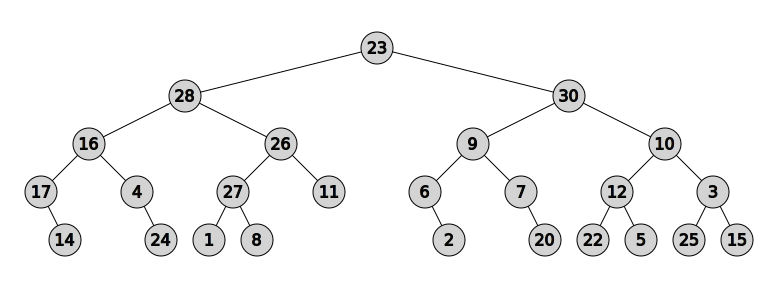

T2:


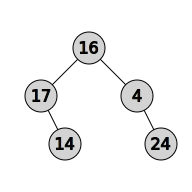

In [12]:
from binarytree import tree, Node

root1 = tree(height=4)
root2 = root1.left.left

print("T1:")
display(root1)
print("T2:")
display(root2)

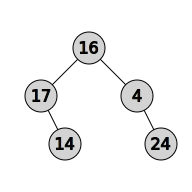

In [17]:
# Traverse T1 until you find a node that has the same value as the root of T2
# Grab the subtree of T1 rooted in that node. We call it S1.
# Traverse S1 and T2 in parallel, checking if they're the same level by level

from typing import Optional
from collections import deque


def find_node_by_value(value: int, under: Node) -> Optional[Node]:
    """Finds the *first* node that matches a given value.
    
    Args:
        value: An integer.
        under: A Node under which we will search for the value.
    Returns:
        A node with the given value, or None if the value is not found.
    """
    to_visit = deque([under])
    while to_visit:
        node = to_visit.popleft()
        if node.value == value:
            return node
        if node.left:
            to_visit.append(node.left)
        if node.right:
            to_visit.append(node.right)
    return None





def is_subtree(root1: Node, root2: Node) -> bool:
    """Checks if the tree under root2 is a subtree of the tree under root1.
    # TODO: Add Args and Returns.
    """
    s1 = find_node_by_value(root2.value, under=root1)
    # ^ Subtree of T1 with a root of the same value as the root of T2

    if s1 is None:
        return False
    
    for node1, node2 in traverse_together(s1, root2):
        if node1.value != node2.value:
            return False
        
    return True

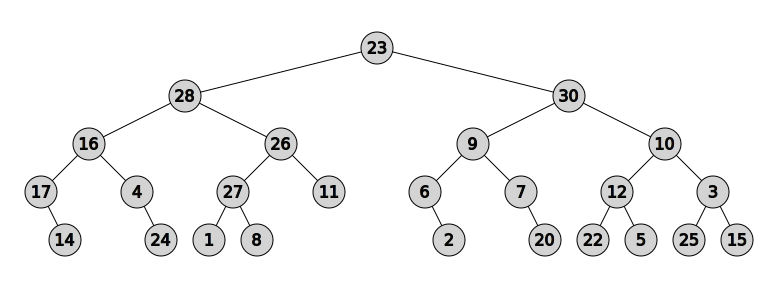

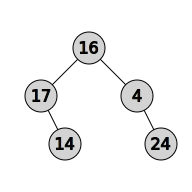

23 16
28 17
30 4
16 14
26 24


In [22]:
from typing import Generator


def traverse_together(root1: Node, root2: Node) -> Generator[tuple[Node, Node], None, None]:
    to_visit_1 = deque([root1])
    to_visit_2 = deque([root2])

    while to_visit_1 and to_visit_2:
        node1 = to_visit_1.popleft()
        node2 = to_visit_2.popleft()

        yield node1, node2

        if node1.left:
            to_visit_1.append(node1.left)
        if node1.right:
            to_visit_1.append(node1.right)
        if node2.left:
            to_visit_2.append(node2.left)
        if node2.right:
            to_visit_2.append(node2.right)


display(root1)
display(root2)
for n1, n2 in traverse_together(root1, root2):
    print(n1.value, n2.value)